In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.metrics import pairwise

In [3]:
customers = pd.read_csv(r"C:\Users\pothu\OneDrive\Desktop\zeotap\Customers.csv")
products = pd.read_csv(r"C:\Users\pothu\OneDrive\Desktop\zeotap\Products.csv")
transactions = pd.read_csv(r"C:\Users\pothu\OneDrive\Desktop\zeotap\Transactions.csv")

In [5]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [7]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [9]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [11]:
transaction_summary = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',  
    'Quantity': 'sum',     
}).reset_index()

customer_data = pd.merge(customers, transaction_summary, on='CustomerID', how='left')

customer_data.fillna(0, inplace=True)

print(customer_data.head())

  CustomerID        CustomerName         Region  SignupDate  TotalValue  \
0      C0001    Lawrence Carroll  South America  2022-07-10     3354.52   
1      C0002      Elizabeth Lutz           Asia  2022-02-13     1862.74   
2      C0003      Michael Rivera  South America  2024-03-07     2725.38   
3      C0004  Kathleen Rodriguez  South America  2022-10-09     5354.88   
4      C0005         Laura Weber           Asia  2022-08-15     2034.24   

   Quantity  
0      12.0  
1      10.0  
2      14.0  
3      23.0  
4       7.0  


In [13]:
from sklearn.preprocessing import StandardScaler

features = customer_data[['TotalValue', 'Quantity']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

db_index_values = []
n_clusters_range = range(2, 11)

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(features_scaled)
    db_index = davies_bouldin_score(features_scaled, labels)
    db_index_values.append(db_index)

optimal_n_clusters = n_clusters_range[db_index_values.index(min(db_index_values))]

print(f"Optimal number of clusters: {optimal_n_clusters}")
print(f"DB Index value: {min(db_index_values)}")

Optimal number of clusters: 2
DB Index value: 0.6298644531019864


C:\Users\pothu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pothu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pothu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pothu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

C:\Users\pothu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


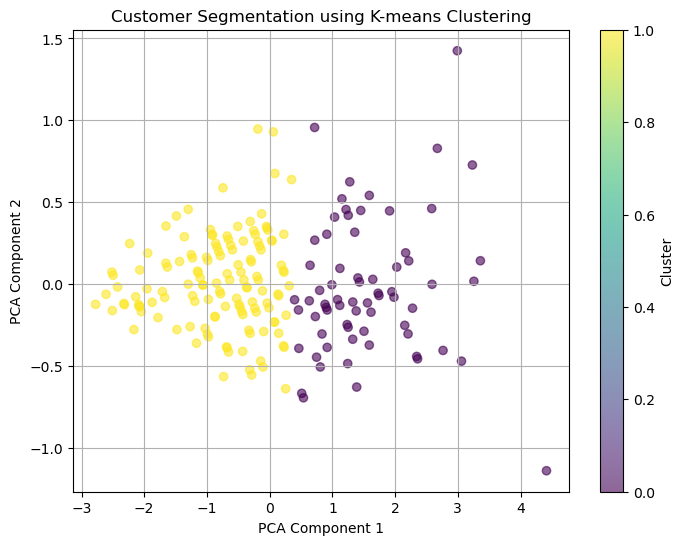

In [23]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(features_scaled)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features_scaled)

customer_data['PCA1'] = reduced_data[:, 0]
customer_data['PCA2'] = reduced_data[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(customer_data['PCA1'], customer_data['PCA2'], c=customer_data['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [25]:
customer_data.to_csv('Customer_Segmentation_Results.csv', index=False)

In [27]:
pwd

'C:\\Users\\pothu'